<a href="https://colab.research.google.com/github/hongwon2/HG-MLDL/blob/main/2_%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 2개의 층

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0 #(0 ~ 1 값으로 바꾸기)
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

케라스의 Dense 클래스는 뉴런의 입력과 출력을 연결해주는 역할을 합니다. 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개라면 총 연결선은 4 x 8 = 32개 입니다. 각 연결선은 가중치(weight) 를 포함하고 있는데 뉴런의 시냅스처럼 입력 값에 대한 연결 강도와 같습니다.

가중치가 높을 수록 입력값이 출력값에 미치는 영향이 커지고, 낮을 수록 영향이 작아집니다. 성별을 판단하는 문제에서, 뉴런의 출력값이 성별이고, 입력값이 머리길이, 키, 혈액형 등이라고 할 때, 머리길이의 가중치가 높고, 키의 가중치는 중간, 혈액형의 가중치는 가장 낮을 것입니다. 딥러닝 학습과정에서는 이러한 가중치들을 계속 조정을 하며 최적값을 찾아나갑니다.

Dense의 주요 인자들은 아래와 같습니다.

첫번째 인자(units): 출력 뉴런의 수를 설정합니다.  

input_dim : 입력 뉴련의 수를 설정합니다.  


activation : 활성화함수를 설정합니다.  

- linear : 디폴트 값으로 입력값과 가중치로 계산된 결과 값이 그대로 출력으로 나옵니다  

- sigmoid : 시그모이드 함수로 이진분류에서 출력층에 주로 쓰입니다  

- softmax : 소프드맥스 함수로 다중클래스 분류문제에서 출력층에 주로 쓰입니다.  

- relu: Rectified Linear Unit 함수로 은닉층에서 주로 쓰입니다.  

Dense 레이어는 입력 뉴런 수에 관계 없이 출력 뉴런 수를 자연스럽게 설정할 수 있어 출력층으로 많이 사용됩니다. 이진분류 문제에서는 0과 1을 나타내는 출력 뉴런이 1개만 있으면 되기 때문에, 입력값과 가중치의 계산값을 0과 1사이로 표현하는 활성화 함수인 sigmoid를 사용합니다.

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) 
# 인풋 층 784개의 특성 (특성 값은 0~255(색깔값))
dense2 = keras.layers.Dense(10, activation='softmax') # 두번째 은닉층 = 마지막 은닉층 = 결과층

# 심층 신경망 만들기

In [ ]:
model = keras.Sequential([dense1, dense2])  # sequential = 그 입력층~은닉층~출력층 해놓은 프레임 워크 블러오기
# 28*28 = 784 -> 784개의 기울기 + bias = 785 ------------ y = x1*w1 + x2*w2 + ''' + bias * 은닉층 1개 100개 노드 = 78500 개의 특성 생성 , 100노드를 다시 출력층 출력층 10개(옷 개수) + 1(bias ) 노드로 출력층 계산 100*11 = 1010

In [ ]:
model.summary() # 100개 , 10 개의 선형방정식을 만들어서 예측 하는게 딥러닝이다~

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# 층을 추가하는 다른 방법

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='fashion_mnist_model')

In [ ]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5630 - accuracy: 0.8083
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4082 - accuracy: 0.8528
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3744 - accuracy: 0.8654
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3504 - accuracy: 0.8729
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3329 - accuracy: 0.8780


# 렐루 활성화 함수

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5308 - accuracy: 0.8108
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3922 - accuracy: 0.8582
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3555 - accuracy: 0.8720
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3324 - accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3183 - accuracy: 0.8857


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3694 - accuracy: 0.8724


[0.36935484409332275, 0.8724166750907898]

# 옵티마이저

## keras.Model.compile()에는 세 개의 파라미터가 중요하다. (딥러닝의 설정치 모음 느낌)

### ● loss : 최적화 과정에서 최소화될 손실함수를 설정하는 것으로, MSE(평균 제곱 오차)와  2개 일 시 binary_crossentropy, 3개 이상 분류 시 sparse_categorical_crossentropy가 자주 사용된다

### ● optimizer : 훈련 과정을 설정하는 것으로, Adam, SGD 등이 있다

###● metrics : 훈련을 모니터링하기 위해 사용한다



In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5) # 5번을 돌릴 수록 loss 함수가 가중치를 조절 함 -> 돌릴수록 loss(에러)가 줄어들고 정확도가 높아지는 것을 볼 수 있음.

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5212 - accuracy: 0.8176
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3927 - accuracy: 0.8586
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3542 - accuracy: 0.8712
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3297 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3091 - accuracy: 0.8857


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.8715


[0.3556668758392334, 0.8715000152587891]

# 손실 곡선

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

#직접 함수를 만들어 오차값, 정확도 값의 히스토리를 볼 수 있음

In [ ]:
model = model_fn()

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # vervose = 0 로 에포크 별 훈련 결과를 생략

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


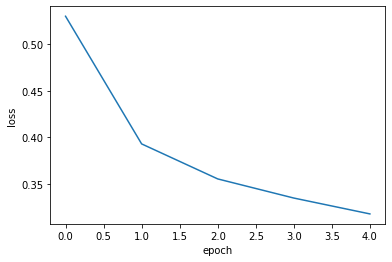

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

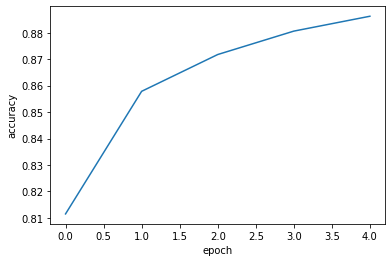

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

# 검증 손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') #옵티마이저 지정 x -> 디폴트 함수인 RMSprop으로 지정 됨

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target)) #언더핏팅인지 오버핏팅인지를 보려면 훈련 결과 점수 뿐 아니라 검증결과 점수도 필요함

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


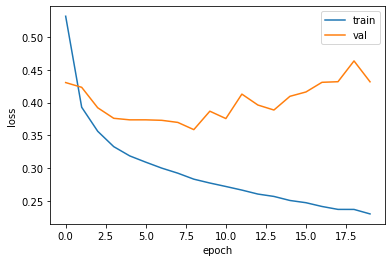

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#에포크가 반복 될 수록 val 세트의 loss 값이 올라가는 걸 볼 수있음

In [ ]:
# 옵티마이저를 RMSprop 이 아닌 adam 으로 한다면?
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

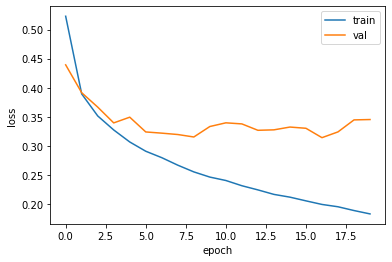

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#adam 사용 시 val 값이 비교적 안정 됨

## 또 다른 규제 방법은?
# 드롭 아웃 - 다음 주 수요일에 계속..